In [650]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [651]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [652]:
pd.set_option('display.max_columns', 100 )
pd.set_option('display.max_rows', 100)

In [653]:
production = pd.read_csv('production.csv')

In [654]:
harpy = production[:1350]
westeros = production[1350:]

In [655]:
def mean_month_defect(maker):
    
    maker = maker.groupby(by=['production.date', 'unsullen.id']).sum()
    maker.drop(['report.date'], axis='columns', inplace=True)
    maker.reset_index(inplace=True)
    
    maker['defects'] /= (7 - maker['production.date'])
#     maker['defects'] = round(maker['defects'])
    maker.rename(columns={'defects': 'mean defects'}, inplace=True)
    maker['relative error'] = (1 - (maker['produced'] - maker['mean defects'])/maker['produced'])*100
    
    return maker

In [656]:
harpy_mean_defects = mean_month_defect(harpy)
westeros_mean_defects = mean_month_defect(westeros)

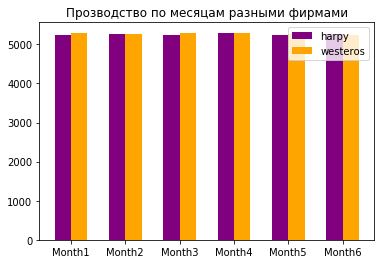

In [657]:
cat_par = [f"Month{i}" for i in range(1,7)]
width = 0.3

x = np.arange(len(cat_par))
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, harpy_mean_defects[['production.date', 'produced']].\
                groupby('production.date').sum().values[:,0], width,color='purple', label='harpy')
rects2 = ax.bar(x + width/2, westeros_mean_defects[['production.date', 'produced']].\
                groupby('production.date').sum().values[:,0], width,color='orange', label='westeros')

ax.set_title('Прозводство по месяцам разными фирмами')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

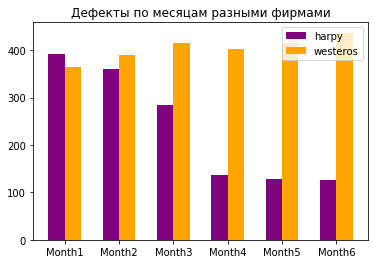

In [658]:
cat_par = [f"Month{i}" for i in range(1,7)]
width = 0.3

x = np.arange(len(cat_par))
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, harpy_mean_defects[['production.date', 'mean defects']].\
                groupby('production.date').sum().values[:,0], width,color='purple', label='harpy')
rects2 = ax.bar(x + width/2, westeros_mean_defects[['production.date', 'mean defects']].\
                groupby('production.date').sum().values[:,0], width,color='orange', label='westeros')

ax.set_title('Дефекты по месяцам разными фирмами')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

Text(0.5, 1.0, 'Relative Error')

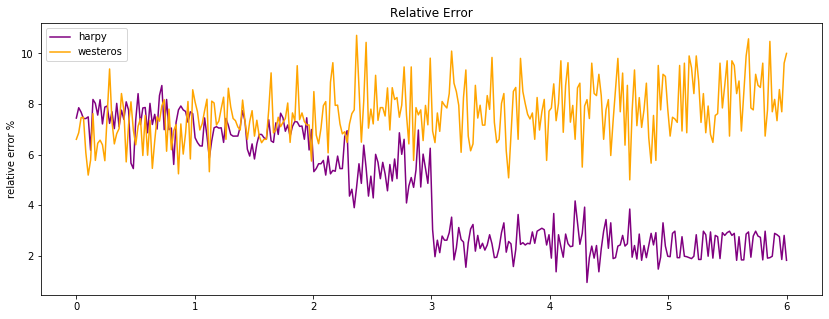

In [659]:
fig = plt.figure(figsize= (14,5))

y = np.linspace(0, 6, 300)
harpy_mean_defects.index = y
westeros_mean_defects.index =y

harpy_mean_defects['relative error'].plot.line(color='purple', label='harpy')
westeros_mean_defects['relative error'].plot.line(color='orange', label='westeros')

plt.ylabel('relative error %')
plt.legend()
plt.title("Relative Error")

Text(0.5, 1.0, 'Produced/defects density')

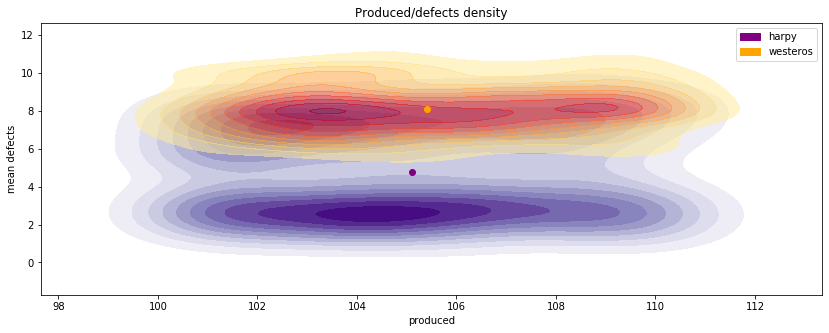

In [660]:
fig = plt.figure(figsize= (14,5))

plt.plot(harpy_mean_defects['produced'].mean(), harpy_mean_defects['mean defects'].mean(), 'ro', color = 'purple')
plt.plot(westeros_mean_defects['produced'].mean(), westeros_mean_defects['mean defects'].mean(), 'ro', color = 'orange')

sns.kdeplot(harpy_mean_defects['produced'], harpy_mean_defects['mean defects'], color='purple',\
            shade=True, cmap="Purples", shade_lowest=False, alpha = 1, legend=True, label='harpy')
sns.kdeplot(westeros_mean_defects['produced'], westeros_mean_defects['mean defects'], color='orange',\
            shade=True, cmap = "YlOrRd", shade_lowest=False, alpha = 0.55, legend=True, label='westeros')

plt.legend()
plt.title("Produced/defects density")

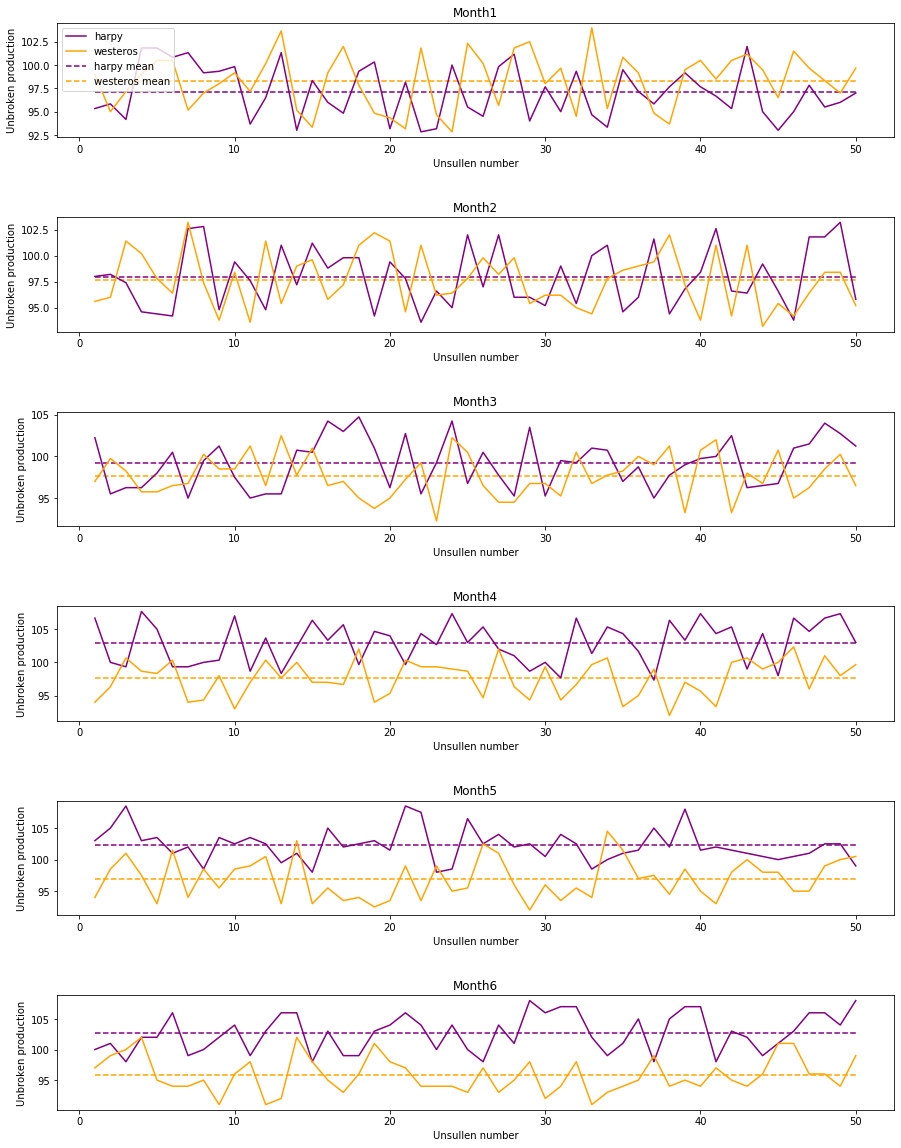

In [661]:
harpy_mean_defects['suitable'] = harpy_mean_defects['produced'] - harpy_mean_defects['mean defects']
westeros_mean_defects['suitable'] = westeros_mean_defects['produced'] - westeros_mean_defects['mean defects']

fig, axes = plt.subplots(6, 1)

fig.set_figheight(20)
fig.set_figwidth(15)

for i in range(0,6):
    
    harpy_suitable = harpy_mean_defects[harpy_mean_defects['production.date']==i+1]['suitable']
    westeros_suitable = westeros_mean_defects[westeros_mean_defects['production.date']==i+1]['suitable']
    harpy_unsullen = harpy_mean_defects[harpy_mean_defects['production.date']==i+1]['unsullen.id']
    westeros_unsullen = westeros_mean_defects[westeros_mean_defects['production.date']==i+1]['unsullen.id'] - 50
    
    harpy_mean = harpy_suitable.mean()
    westeros_mean = westeros_suitable.mean()
    
    axes[i].plot(harpy_unsullen, harpy_suitable, color='purple', label='harpy')
    axes[i].plot(westeros_unsullen, westeros_suitable, color='orange', label='westeros')
    axes[i].hlines(harpy_mean, 1, 50, linestyle = '--', color='purple', label='harpy mean')
    axes[i].hlines(westeros_mean, 1, 50, linestyle = '--', color='orange', label='westeros mean')

    axes[i].set_title("Month{}".format(i+1))
    axes[i].set_xlabel('Unsullen number')
    axes[i].set_ylabel('Unbroken production')
    
axes[0].legend(loc=2)        
plt.subplots_adjust(hspace=0.7) 
# plt.show()